<a href="https://colab.research.google.com/github/Battula-Shilpa/-Machine-Learning/blob/main/1_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION

- Linear Regression is a supervised learning algorithm used to predict a continuous output (Y) based on input features (X). It finds the best-fit line that describes the relationship between the input and output.

- **Types of Linear Regression :-**
   1. *Simple Linear Regression* → One
      input variable (X)

    Equation: Y = mX+c

   2. *Multiple Linear Regression* →
      Multiple input variables(𝑋1,𝑋2,.𝑋𝑛)

    Equation: Y = b0+b1X1+b2X2+...+bnXn

- 📌 Best Fit Line → Line that minimizes prediction error
- 📌 Loss Function → Measures error (commonly Mean Squared Error)
   - MSE helps measure how far predictions are from actual values.
- 📌 Gradient Descent → Optimizes slope and intercept to minimize error
- 📌 R² (R-Squared) → Measures how well the model fits the data
- 📌 Adjusted R² →  Adjusts for extra variables (prevents overfitting)

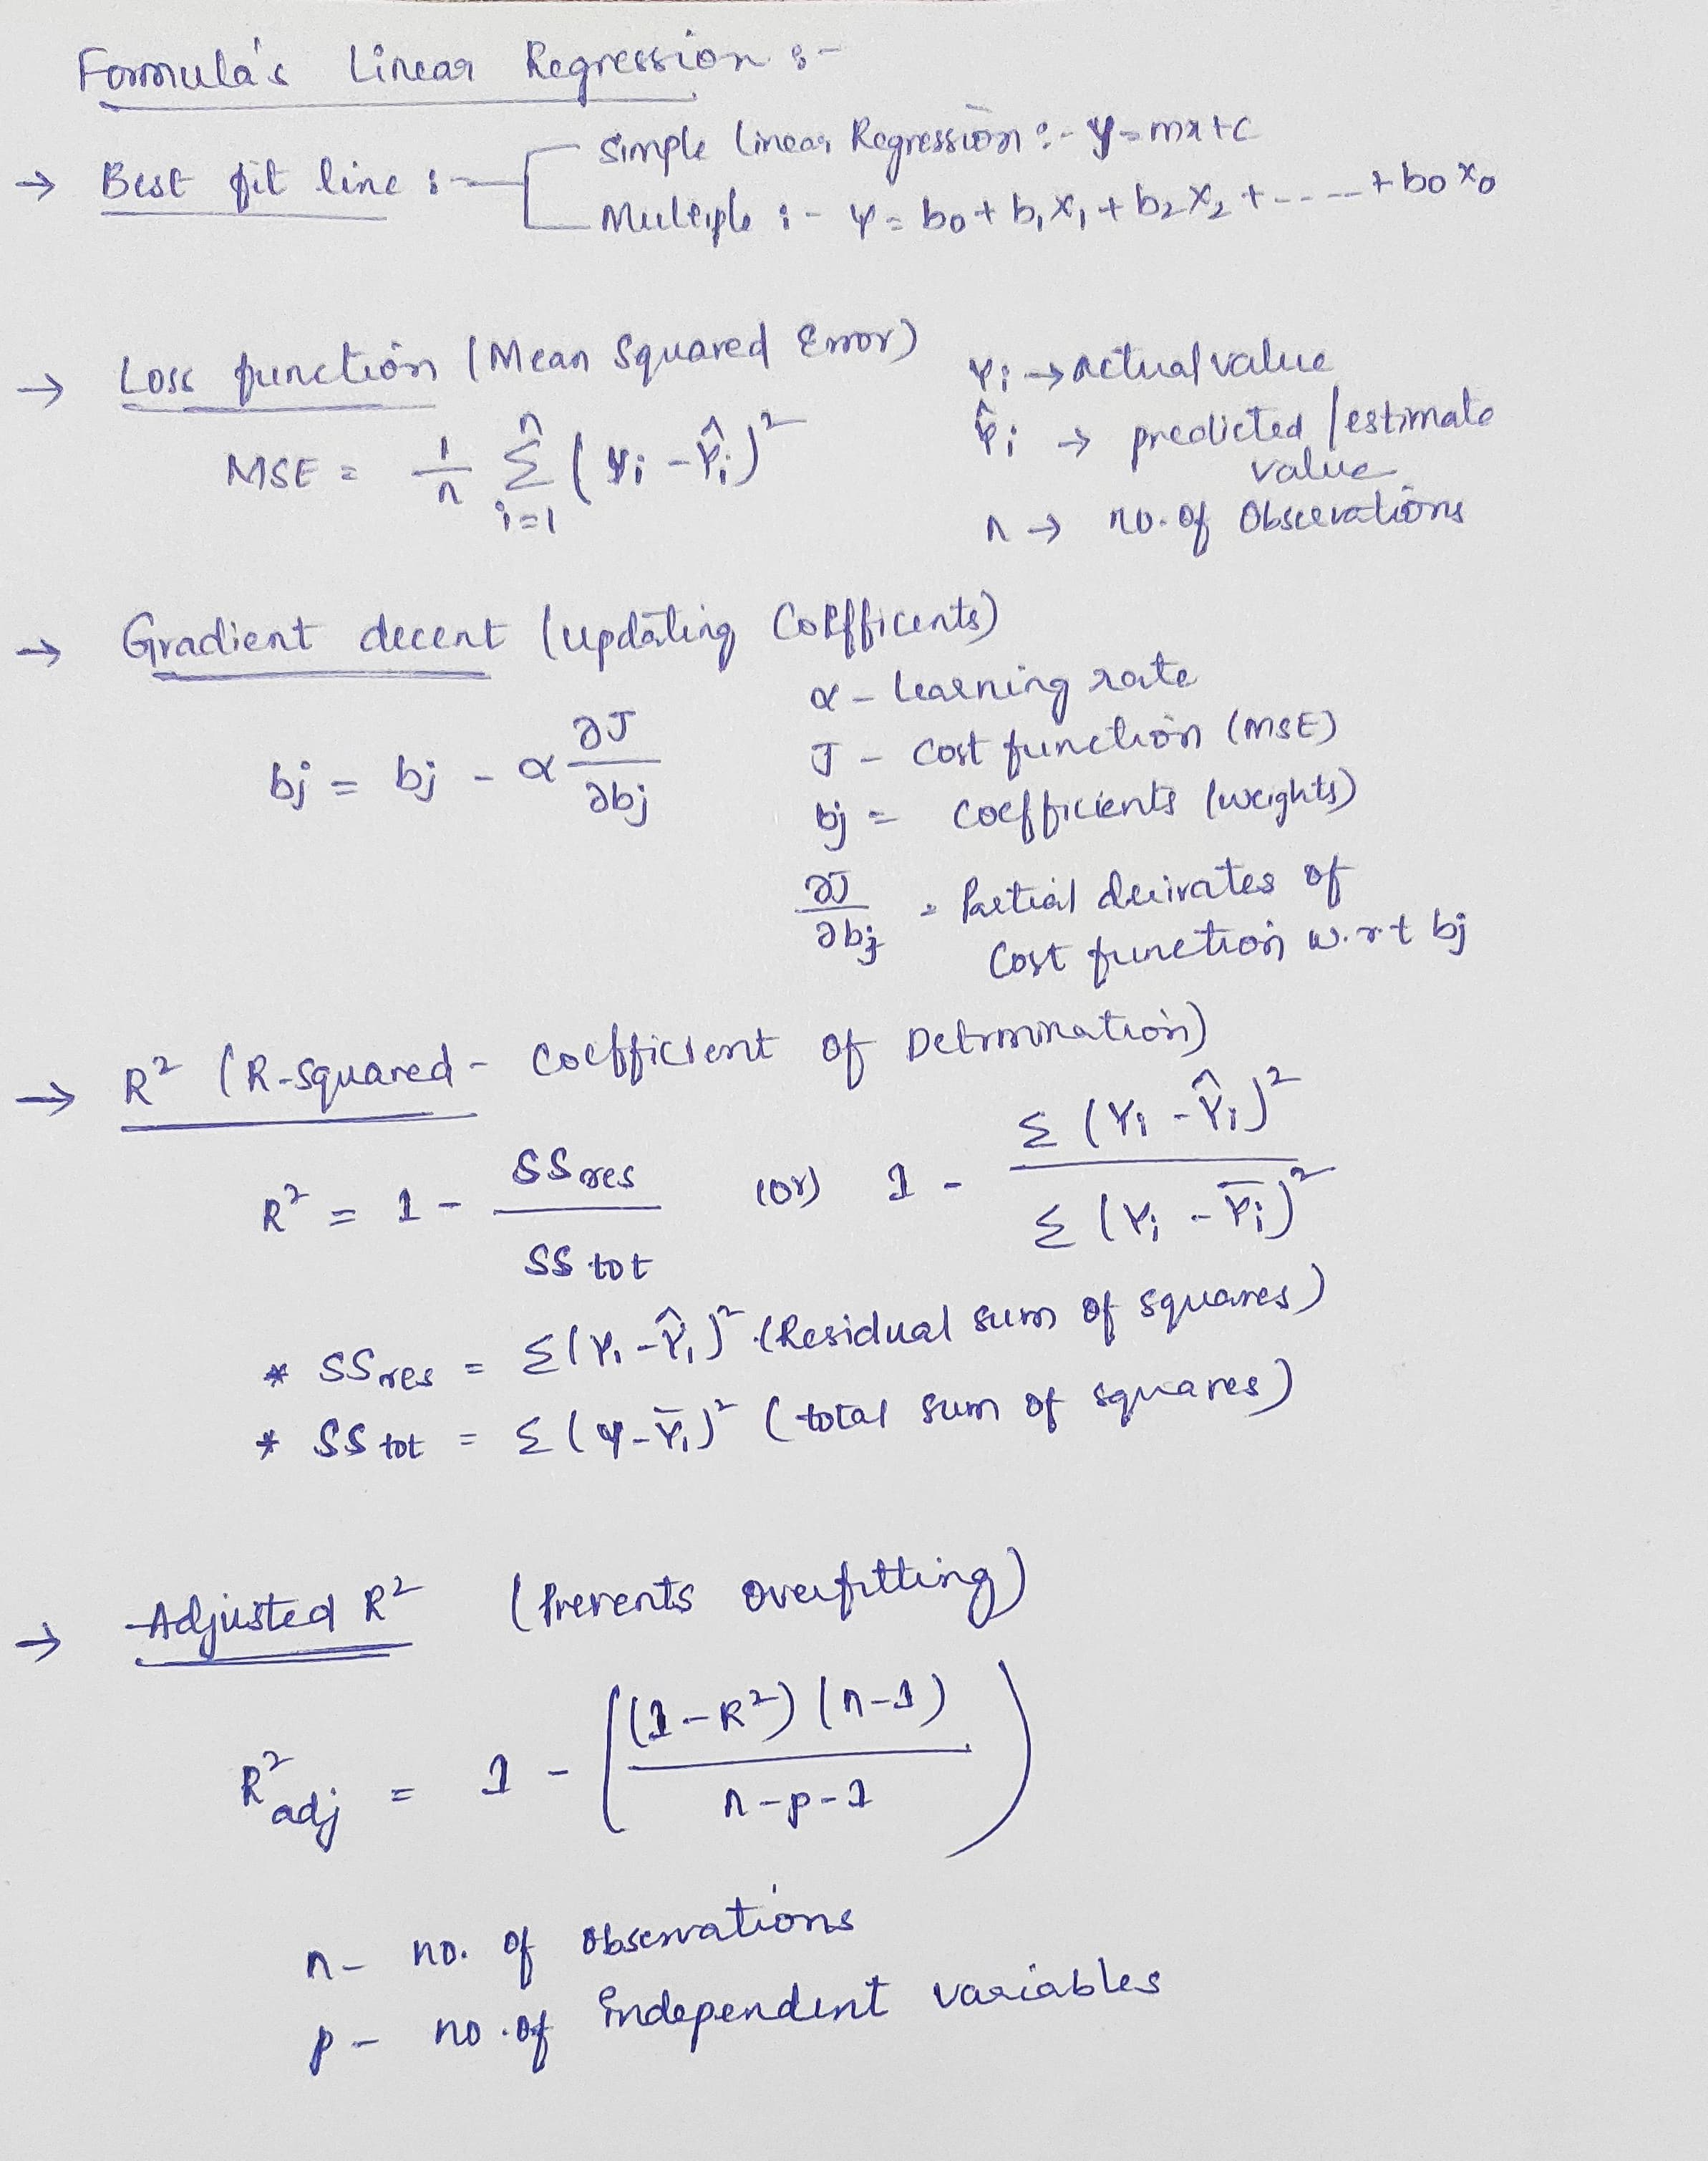



#  Basic Code


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
weeks_data = [1,2,3,4,5]
sales_data = [2,4,5,4,5]

df = pd.DataFrame({'Weeks':weeks_data,'Sales':sales_data})
df

,Weeks,Sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [ ]:
X = df["Weeks"].values
X

array([1, 2, 3, 4, 5])

In [ ]:
Y = df["Sales"].values
Y

array([2, 4, 5, 4, 5])

In [ ]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)

numer = 0
denom = 0
for i in range(n):
  numer += (X[i] - mean_x) * (Y[i] - mean_y) # (X-X̄) * (Y-Ȳ)
  denom += (X[i] - mean_x) ** 2  # (X-X̄)^2
m = numer / denom
c = mean_y - (m * mean_x)

print(f"m : {m}")
print(f"c : {c}")

m : 0.6
c : 2.2


In [ ]:
# plot
max_x = np.max(X)+1
min_x = np.min(X)-1

x = np.linspace(max_x,min_x,num=10)
y = (m*x)+c
print(y)
print("length y: ",len(y))

[5.8 5.4 5.  4.6 4.2 3.8 3.4 3.  2.6 2.2]
length y:  10


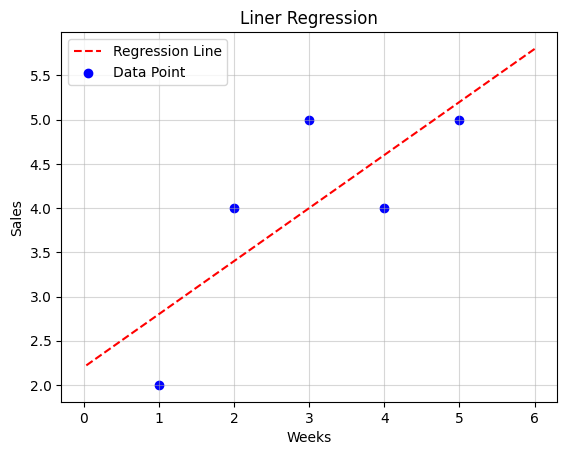

In [ ]:
plt.plot(x,y,color= "red",label = "Regression Line",linestyle = "--")
plt.scatter(X,Y,color = "blue",label = "Data Point")
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.title("Liner Regression")
plt.grid(True, alpha=0.5)
plt.legend(loc='best')
plt.show()

****

**R²**

In [ ]:
ss_res = 0
ss_tot = 0
for i in range(n):
  y_pred = (m * X[i]) + c
  ss_res += (Y[i] - y_pred)**2
  ss_tot += (Y[i]-mean_y)**2

r2 = 1-(ss_res/ss_tot)
print("r2 =",r2)

r2 = 0.6000000000000001


In [ ]:
#validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X = X.reshape(n,1)
X #2d format

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [ ]:
y_pred = (m * X) + c
print(y_pred)

[[2.8]
 [3.4]
 [4. ]
 [4.6]
 [5.2]]


In [ ]:
R2 = reg.score(X,Y)
print("r2 =",R2)

r2 = 0.6000000000000001


# **Code**

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
#From kaggle
!kaggle datasets download -d anubhabswain/brain-weight-in-humans

Dataset URL: https://www.kaggle.com/datasets/anubhabswain/brain-weight-in-humans
License(s): copyright-authors
  0% 0.00/1.33k [00:00<?, ?B/s]
100% 1.33k/1.33k [00:00<00:00, 2.85MB/s]


In [ ]:
import zipfile
import os

#download the zip path
zip_file = "/content/drive/MyDrive/Colab Notebooks/3.MACHINE LEARNING/brain-weight-in-humans.zip"

#Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('human_brain')

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3.MACHINE LEARNING/human_brain/dataset.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [ ]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [ ]:
df.shape

(237, 4)

In [ ]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [ ]:
df['Gender'].value_counts()

,count
Gender,
1,134
2,103


In [ ]:
df['Age Range'].value_counts()

,count
Age Range,
2,127
1,110


- Gender, Age Range --> Categorical variable
- Head Size(cm^3), Brain Weight(grams) --> Continous variable
-- In linear regeression rule is
      - Target variable ----> is must be continous

In [ ]:
df.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [ ]:
X = df['Head Size(cm^3)'].values
#X

In [ ]:
Y = df['Brain Weight(grams)'].values
#Y

In [ ]:
X = X.reshape(-1,1)
X.ndim

2

In [ ]:
#example convert 1D to 2D
arr =np.array([1,2,3,4,5])
reshaped = arr.reshape((-1,1))
reshaped

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.740092058428885

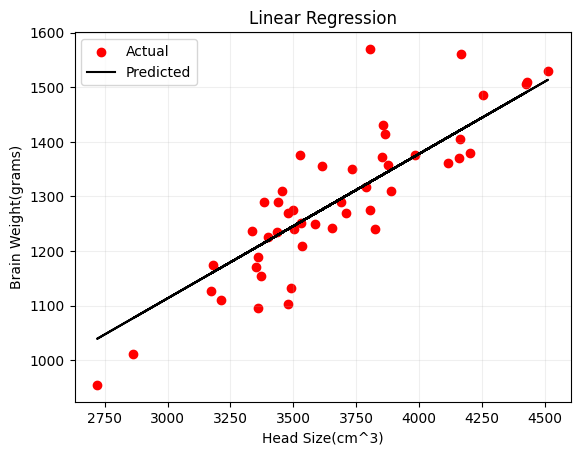

In [ ]:
plt.scatter(X_test,y_test,color = "red",label = "Actual")
plt.plot(X_test,y_pred,color = "black",label = "Predicted")
plt.legend()
plt.grid(True, alpha=0.2)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.title("Linear Regression")
plt.show()

In [ ]:
lr.predict([[3982]])

array([1373.30488329])